# OpenOOD Results

This notebook compiles the results of the OpenOOD experiments and outputs them to latex tables.

In [1]:
import pandas as pd
import torch
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from hips.plotting.layout import create_axis_at_location
sns.set_context('paper')
sns.set_style('ticks')

# Compare effect of preprocessing across EM methods

In [11]:
template = "openood_exps/{}/results/{}.result"
exp_fnames = dict( 
    msp={pp[:-4]: template.format("msp", pp) for pp in ["vit768_msp", "autowhiten_msp", "pca765_msp"]},
    temp_msp={pp[:-9]: template.format("msp", pp) for pp in ["vit768_temp_msp", "autowhiten_temp_msp", "pca765_temp_msp"]},
    mds={pp[:-4]: template.format("mds_rmds", pp) for pp in ["vit768_mds", "autowhiten_mds", "pca765_mds"]},
    rmds={pp[:-5]: template.format("mds_rmds", pp) for pp in ["vit768_rmds", "autowhiten_rmds", "pca765_rmds"]},
    irmds={pp[:-11]: template.format("mds_rmds", pp) for pp in ["vit768_indep_rmds", "autowhiten_indep_rmds", "pca765_indep_rmds"]},
    full={pp: template.format("full", pp) for pp in ["vit768", "autowhiten", "pca765"]},
    diag={pp: template.format("diag", pp) for pp in ["vit768", "autowhiten", "pca765"]},
    coupled_diag={pp: template.format("coupled_diag", pp) for pp in ["vit768", "autowhiten", "pca765"]},
    tied={pp: template.format("tied", pp) for pp in ["vit768", "autowhiten", "pca765"]},
)
exp_results = {m: {pp: torch.load(fname, weights_only=False) for pp, fname in exp_fnames[m].items()} for m in exp_fnames.keys()}
for m,v in exp_results.items():
    for pp, res in v.items():
        res["openood"]["acc"] = res["openood"]["acc"].item()

In [13]:
method_display_names = dict(
    msp="MSP", temp_msp="Temp. MSP",
    mds="MDS", rmds="RMDS",
    irmds="Independent RMDS",
    full="HDPMM", diag="Diag. HDPMM", coupled_diag="Coupled Diag. HDPMM",
    tied="Tied HDPMM",
    )
preprocessor_display_names = dict(vit768="ViT", autowhiten="MCW", pca765="PCA")
preprocessor_dim = dict(vit768=768, autowhiten=765, pca765=765)
li = []
for m,v in exp_results.items():
    for pp, res in v.items():
        temp = dict(res["openood"])
        temp.update(
            {"Method": method_display_names[m],
             "Preprocessor": preprocessor_display_names[pp],
             "Dim": preprocessor_dim[pp]
            },)
        li.append(pd.Series(temp))
exp_df = pd.DataFrame(li)
# exp_df.drop(columns=["index"], inplace=True)
pd.options.display.float_format = "{:.2%}".format
exp_df.set_index(["Method", "Preprocessor", "Dim"], inplace=True)
dataset_display_names = dict(acc="Accuracy", ssb_hard="SSB Hard", ninco="NINCO",
                             near="Near", inaturalist="iNaturalist", openimage_o="OpenImage O",
                             textures="Textures", far="Far")
exp_df.rename(columns=dataset_display_names, inplace=True)
exp_df

Accuracy  SSB Hard  NINCO   Near  \
Method              Preprocessor Dim                                     
MSP                 ViT          768    80.94%    73.80% 82.72% 78.26%   
                    MCW          765    80.89%    71.75% 79.87% 75.81%   
                    PCA          765    80.90%    73.61% 82.91% 78.26%   
Temp. MSP           ViT          768    80.94%    75.60% 84.36% 79.98%   
                    MCW          765    80.89%    73.29% 81.27% 77.28%   
                    PCA          765    80.90%    75.18% 84.68% 79.93%   
MDS                 ViT          768    80.15%    71.38% 86.42% 78.90%   
                    MCW          765    80.41%    71.45% 86.48% 78.97%   
                    PCA          765    80.41%    71.45% 86.48% 78.97%   
RMDS                ViT          768    80.15%    60.97% 69.45% 65.21%   
                    MCW          765    80.41%    72.79% 87.28% 80.03%   
                    PCA          765    80.41%    72.79% 87.28% 80.03%   
Independent RMDS    ViT          768     1.20%    49.94% 41.98% 45.96%   
                    MCW          765     1.23%    42.89% 39.33% 41.11%   
                    PCA          765     7.28%    46.92% 40.09% 43.50%   
HDPMM               ViT          768    76.82%    62.64% 78.33% 70.48%   
                    MCW          765    76.79%    62.84% 78.48% 70.66%   
                    PCA          765    76.82%    62.64% 78.33% 70.49%   
Diag. HDPMM         ViT          768    75.96%    72.38% 85.96% 79.17%   
                    MCW          765    76.54%    73.89% 87.32% 80.60%   
                    PCA          765    75.76%    71.99% 85.52% 78.75%   
Coupled Diag. HDPMM ViT          768    75.94%    72.80% 86.15% 79.48%   
                    MCW          765    76.51%    74.47% 87.48% 80.98%   
                    PCA          765    75.76%    72.40% 85.97% 79.19%   
Tied HDPMM          ViT          768    80.40%    71.79% 86.75% 79.27%   
                    MCW          765    80.41%    71.80% 86.76% 79.28%   
                    PCA          765    80.40%    71.79% 86.75% 79.27%   

                                      iNaturalist  OpenImage O  Textures  \
Method              Preprocessor Dim                                       
MSP                 ViT          768       92.08%       88.67%    88.39%   
                    MCW          765       88.66%       85.62%    84.62%   
                    PCA          765       92.16%       88.65%    88.32%   
Temp. MSP           ViT          768       94.22%       90.82%    90.82%   
                    MCW          765       91.23%       87.81%    86.78%   
                    PCA          765       94.31%       90.83%    90.72%   
MDS                 ViT          768       95.94%       92.22%    89.29%   
                    MCW          765       96.00%       92.34%    89.38%   
                    PCA          765       96.00%       92.34%    89.38%   
RMDS                ViT          768       71.45%       71.01%    67.39%   
                    MCW          765       96.09%       92.29%    89.38%   
                    PCA          765       96.09%       92.29%    89.38%   
Independent RMDS    ViT          768       38.14%       38.71%    40.94%   
                    MCW          765       35.74%       38.99%    39.85%   
                    PCA          765       39.90%       40.75%    44.95%   
HDPMM               ViT          768       85.76%       84.95%    88.03%   
                    MCW          765       85.88%       85.03%    88.02%   
                    PCA          765       85.76%       84.95%    88.03%   
Diag. HDPMM         ViT          768       94.14%       90.18%    87.20%   
                    MCW          765       95.36%       90.78%    86.41%   
                    PCA          765       93.91%       90.18%    87.38%   
Coupled Diag. HDPMM ViT          768       94.08%       90.20%    87.19%   
                    MCW          765       95.51%       90.63%    8

In [14]:
(exp_df * 100).to_latex(float_format="{:.2f}".format, buf="openood_exps/preprocessing_results.tex")

In [15]:
method_display_names = dict(
    msp="MSP", temp_msp="Temp. MSP",
    mds="MDS", rmds="RMDS",
    full="HDPMM", diag="Diag. HDPMM", coupled_diag="Coupled Diag. HDPMM",
    tied="Tied DPMM"
    )
preprocessor_display_names = dict(autowhiten="MCW")
li = []
for m,v in exp_results.items():
    if m not in method_display_names:
        continue
    temp = v["autowhiten"]["openood"]
    temp.update({"Method": method_display_names[m]})
    li.append(pd.Series(temp))
exp_df = pd.DataFrame(li)
pd.options.display.float_format = "{:.2%}".format
exp_df.set_index(["Method"], inplace=True)
dataset_display_names = dict(acc="Accuracy", ssb_hard="SSB Hard", ninco="NINCO",
                             near="Near", inaturalist="iNaturalist", openimage_o="OpenImage O",
                             textures="Textures", far="Far")
exp_df.rename(columns=dataset_display_names, inplace=True)
exp_df

,Accuracy,SSB Hard,NINCO,Near,iNaturalist,OpenImage O,Textures,Far
Method,,,,,,,,
MSP,80.89%,71.75%,79.87%,75.81%,88.66%,85.62%,84.62%,86.30%
Temp. MSP,80.89%,73.29%,81.27%,77.28%,91.23%,87.81%,86.78%,88.61%
MDS,80.41%,71.45%,86.48%,78.97%,96.00%,92.34%,89.38%,92.57%
RMDS,80.41%,72.79%,87.28%,80.03%,96.09%,92.29%,89.38%,92.59%
HDPMM,76.79%,62.84%,78.48%,70.66%,85.88%,85.03%,88.02%,86.31%
Diag. HDPMM,76.54%,73.89%,87.32%,80.60%,95.36%,90.78%,86.41%,90.85%
Coupled Diag. HDPMM,76.51%,74.47%,87.48%,80.98%,95.51%,90.63%,86.02%,90.72%
Tied DPMM,80.41%,71.80%,86.76%,79.28%,96.00%,92.40%,89.72%,92.70%


In [16]:
(exp_df * 100).to_latex(float_format="{:.2f}".format, buf="openood_exps/mcw_results.tex")

## Dimension Reduction Study

In [9]:
template = "openood_exps/{}/results/{}.result"
exp_fnames = dict( 
    full={f"autowhiten{2**pp:d}": template.format("full", f"autowhiten{2**pp:d}") for pp in range(1, 10)},
    diag={f"autowhiten{2**pp:d}": template.format("diag", f"autowhiten{2**pp:d}") for pp in range(1, 10)},
    coupled_diag={f"autowhiten{2**pp:d}": template.format("coupled_diag", f"autowhiten{2**pp:d}") for pp in range(1, 10)},
    tied={f"autowhiten{2**pp:d}": template.format("tied", f"autowhiten{2**pp:d}") for pp in range(1, 10)},
    irmds={f"autowhiten{2**pp:d}": template.format("mds_rmds", f"autowhiten{2**pp:d}_indep_rmds") for pp in range(1, 10)},
)
exp_fnames["full"]["autowhiten765"] = template.format("full", "autowhiten")
exp_fnames["diag"]["autowhiten765"] = template.format("diag", "autowhiten")
exp_fnames["coupled_diag"]["autowhiten765"] = template.format("coupled_diag", "autowhiten")
exp_fnames["tied"]["autowhiten765"] = template.format("tied", "autowhiten")
exp_fnames["irmds"]["autowhiten765"] = template.format("mds_rmds", "autowhiten_indep_rmds")

exp_results = {m: {pp: torch.load(fname, weights_only=False) for pp, fname in exp_fnames[m].items()} for m in exp_fnames.keys()}

for m,v in exp_results.items():
    for pp, res in v.items():
        res["openood"]["acc"] = res["openood"]["acc"].item()

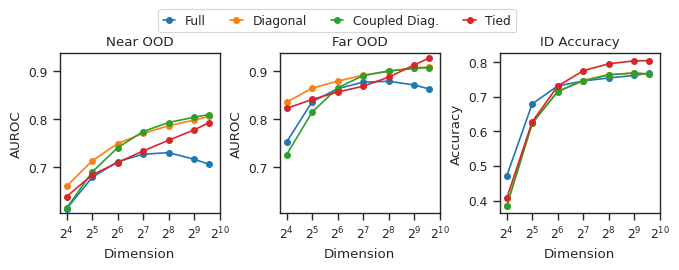

In [10]:
sns.set_context('paper')
# sns.color_palette("hls", 8)
# fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(6.75,2.25))
fig = plt.figure(figsize=(6.75, 2.6))
figwidth=1.6
buff = 0.6
init_offset = 0.6
ax1_offset = init_offset
ax2_offset = init_offset + figwidth + buff
ax3_offset = ax2_offset + figwidth + buff
bot_offset = 0.5
ax1 = create_axis_at_location(fig, ax1_offset, bot_offset, figwidth, figwidth)
ax2 = create_axis_at_location(fig, ax2_offset, bot_offset, figwidth, figwidth)
ax3 = create_axis_at_location(fig, ax3_offset, bot_offset, figwidth, figwidth)
method_display_names = dict(
    full="Full",
    diag="Diagonal",
    coupled_diag="Coupled Diag.",
    tied="Tied",
    # irmds="Independent RMDS",
)
dims = [2**pp for pp in range(4, 10)] + [765]
xticks = [2**pp for pp in range(4, 11)]
nearmin = 1
nearmax = 0
for mod, v in exp_results.items():
    if mod not in method_display_names:
        continue
    nearood = []
    farood = []
    acc = []
    for d in dims:
        k = f"autowhiten{d}"
        nearood.append(v[k]["openood"]["near"])
        farood.append(v[k]["openood"]["far"])
        acc.append(v[k]["openood"]["acc"])
    nearmin = min(nearmin, min(farood), min(nearood))
    nearmax = max(nearmax, max(farood), max(nearood))
    ax1.plot(dims, nearood, label=method_display_names[mod], ms=4, marker='o')
    ax2.plot(dims, farood, label=method_display_names[mod], ms=4, marker='o')
    ax3.plot(dims, acc, label=method_display_names[mod], ms=4, marker='o')

ax1.set_title('Near OOD')
ax1.set_ylabel('AUROC')
ax2.set_title('Far OOD')
ax2.set_ylabel('AUROC')
ax3.set_title('ID Accuracy')
ax3.set_ylabel('Accuracy')
for ax in[ax1, ax2, ax3]:
    ax.set_xlabel('Dimension')
    ax.set_xscale('log', base=2)
    ax.set_xticks(xticks)
buff = 0.01
ax1.set_ylim(max(0, nearmin-buff), min(1, nearmax+buff))
ax2.set_ylim(max(0, nearmin-buff), min(1, nearmax+buff))
h, l = ax3.get_legend_handles_labels()
fig.legend(
    h, l,
    handlelength=1,
    ncols=4,
    loc='upper center',
    bbox_to_anchor=(.5, 1.),
)
plt.savefig(f'autowhiten_study.pdf')
